# Yeast cells detection evaluation notebook

In [1]:
import sys
sys.path.append('../')
#sys.path.append('%HOMEPATH%/detectron2') #insert local path to detecron2
import numpy as np

import yeastcells.clustering as clustering
import yeastcells.features as features
import yeastcells.data as data
import yeastcells.model as model
import yeastcells.output as output
import yeastcells.visualize as visualize
import yeastcells.evaluation as evaluation
# import yeastcells.fp as fp

import matplotlib.pyplot as pyplot
%matplotlib notebook

In [2]:
cd ~

/home/p301081


### Load data

In [39]:
TS = 'TestSet7' #choose YIT test set
path = f'../../slow-data/yeastcells/data/cellstar_benchmark/{TS}'
filenames = data.load_data(path)

In [40]:
image = data.read_images_cat(filenames)
np.shape(image)

(10, 512, 512, 3)

### Load and run model on data for segmentation

In [41]:
precision_s = []
recall_s = []
accuracy_s = []
F_s = []
precision_t = []
recall_t = []
accuracy_t = []
F_t = []

seg_path = f'{path}/GroundTruth_Segmentation.csv'
track_path = f'{path}/GroundTruth_Tracking.csv'
gt_s, gt_t = data.get_gt_yit(seg_path, track_path)

#set path to model_final.pth
model_path = '/var/tensorflow-logs/p253591/yeast-cell-detection-run-4'

sts = [.9,.91,.92,.93,.94,.95,.96,.97,.98,.99]

for i in range(len(sts)):
#load model
    predictor = model.load_model(model_path, seg_thresh=sts[i], device='cuda:0') #set GPU if available otherwise use 'cpu'

    output = [
      {'instances': predictor(frame)['instances'].to('cpu')}
      for frame in image
    ]

    labels, coordinates = clustering.cluster_cells(output, dmax=5, min_samples=3, eps=0.6, progress=False)

    pred_s, pred_t, _ = data.get_pred(output, labels, coordinates)

    pred_s_, results_s = evaluation.get_seg_performance(pred_s, gt_s, output, pipeline='maskrcnn') 
    pred_t_, results_t = evaluation.get_track_performance(pred_t, gt_t, output, pipeline='maskrcnn')

    metrics_s = evaluation.calculate_metrics(results_s, pred_s_, gt_s)
    metrics_t = evaluation.calculate_metrics(results_t, pred_t_, gt_t)
    
    precision_s.append(metrics_s['Precision'])
    recall_s.append(metrics_s['Recall'])
    accuracy_s.append(metrics_s['Accuracy'])
    F_s.append(metrics_s['F1-score'])
    precision_t.append(metrics_t['Precision'])
    recall_t.append(metrics_t['Recall'])
    accuracy_t.append(metrics_t['Accuracy'])
    F_t.append(metrics_t['F1-score'])

/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages

<IPython.core.display.Javascript object>


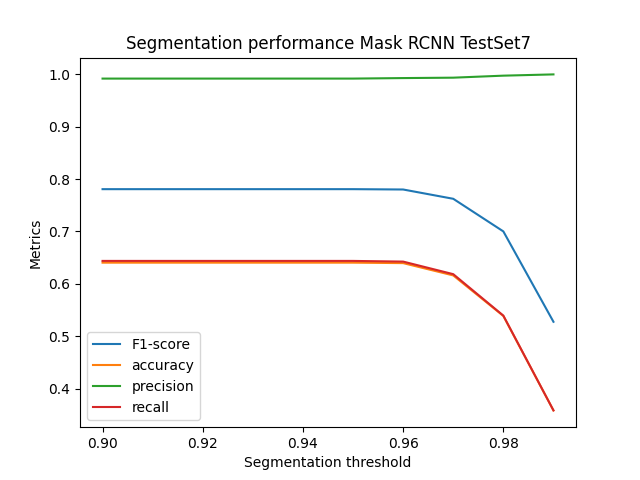

In [42]:
pyplot.figure()
pyplot.title(f'Segmentation performance Mask RCNN {TS}')
pyplot.xlabel('Segmentation threshold')
pyplot.ylabel('Metrics')
pyplot.plot(sts, F_s, label='F1-score')
pyplot.plot(sts, accuracy_s, label='accuracy')
pyplot.plot(sts, precision_s, label='precision')
pyplot.plot(sts, recall_s, label='recall')
pyplot.legend()

<IPython.core.display.Javascript object>


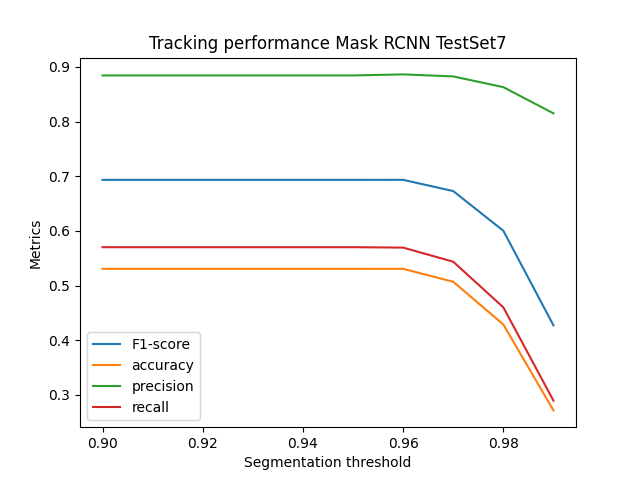

In [43]:
pyplot.figure()
pyplot.title(f'Tracking performance Mask RCNN {TS}')
pyplot.xlabel('Segmentation threshold')
pyplot.ylabel('Metrics')
pyplot.plot(sts, F_t, label='F1-score')
pyplot.plot(sts, accuracy_t, label='accuracy')
pyplot.plot(sts, precision_t, label='precision')
pyplot.plot(sts, recall_t, label='recall')
pyplot.legend()

In [44]:
# rerun pipeline with optimized sts
predictor = model.load_model(model_path, seg_thresh=0.9, device='cuda:0') #set GPU if available otherwise use 'cpu'
output = [
      {'instances': predictor(frame)['instances'].to('cpu')}
      for frame in image
    ]
labels, coordinates = clustering.cluster_cells(output, dmax=5, min_samples=3, eps=0.6, progress=False)
pred_s, pred_t, _ = data.get_pred(output, labels, coordinates)
pred_s_, results_s = evaluation.get_seg_performance(pred_s, gt_s, output, pipeline='maskrcnn') 
pred_t_, results_t = evaluation.get_track_performance(pred_t, gt_t, output, pipeline='maskrcnn')
metrics_s = evaluation.calculate_metrics(results_s, pred_s_, gt_s)
metrics_t = evaluation.calculate_metrics(results_t, pred_t_, gt_t) 

print("%.4f" % metrics_s['Precision'])
print("%.4f" % metrics_s['Recall'])
print("%.4f" % metrics_s['Accuracy'])
print("%.4f" % metrics_s['F1-score'])
print("%.4f" % metrics_t['Precision'])
print("%.4f" % metrics_t['Recall'])
print("%.4f" % metrics_t['Accuracy'])
print("%.4f" % metrics_t['F1-score'])

/home/p301081/.virtualenvs/yeastcells/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


0.9920
0.6437
0.6404
0.7808
0.8843
0.5702
0.5306
0.6933
